Guide d'utilisation:

In [1]:
from simu_cmtc.fonction import *
from matplotlib.pyplot import *

Exemple d'une sumulation d'un système SIR et du calcul de C:

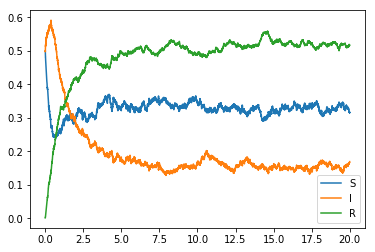

In [2]:
liste_transitions = [ array(l) for l in [ [-1.,+1.,0.], [0.,-1.,1.], [2.,-1.,-1.] ] ]

def taux ( i, x):
    if i==0:
        return 3*x[0]*x[1]+0.5*x[0]
    elif i==1:
        return x[1]
    else:
        return 2*x[1]*x[2]
    
labels=["S","I","R"]
X=array([0.5,0.5,0.])

simu_cmtc(taux,liste_transitions,X,1000,20,"data.out",1234)

data=file_to_array("data.out",3)

for i in range(3):
    plot(data[0],data[1][:,i], label=labels[i])

legend()
show()

In [3]:
N=linspace(10,1000,20)
diff=array([[0. for i in N] for j in range(3)])
C_i=array([[0. for i in N] for j in range(3)])

X_0=fixed_point(taux,liste_transitions,3)

In [4]:
for n in range(len(N)):
    for j in range(100):
        simu_cmtc(taux,liste_transitions,X,N[n],50,"data/data_"+str(n)+"-"+str(j))

In [5]:
def moy_pond(data,deb,fin,i):
    m=0
    for j in range(deb,fin):
        m+= data[1][j][i]*(data[0][j]-data[0][j-1])
    m=m/(data[0][fin-1]-data[0][deb-1])
    return(m)

for n in range(len(N)):
    for j in range(100):
        data=file_to_array("data/data_"+str(n)+"-"+str(j),len(X))
        for i in range(3):
            diff[i,n]+=(moy_pond(data,int(len(data[1])/2),len(data[1]),i)-X_0[i])/100.
    for i in range(3):
        C_i[i,n]=N[n]*diff[i,n]

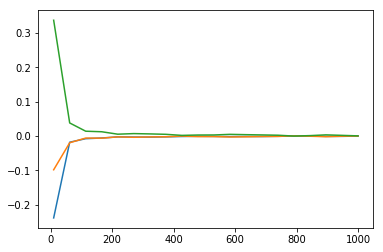

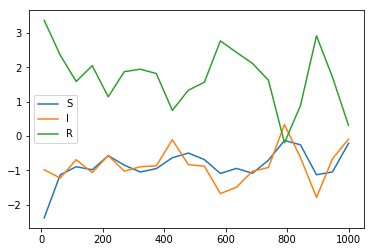

In [6]:
for i in range(3):
    plot(N,diff[i,:])
show()
for i in range(3):
    plot(N,C_i[i,:])
legend(('S','I','R'))
show()

In [5]:
theorique(taux,liste_transitions,3,2)

[-0.75000000000000111, -0.96428571428571352]

Exemple: Bianchi's formula

In [6]:
N=100
K=5
Var_x=array([sym.symbols('x_{}'.format(i)) for i in range(K)])
#Var_q=array([sym.symbols('q_{}'.format(i)) for i in range(K)])
Var_q=array([2**(-i) for i in range(K)])

def mult_liste(Liste):
    S=1
    for i in Liste:
        S*=i
    return(S)

E=[array([1 if i==j else 0 for j in range(K)]) for i in range(K)]

liste_transitions =[]
taux=[]

liste_transitions.append(E[1]-E[0])
taux.append(Var_q[0]*Var_x[0]*(1-mult_liste([(1-Var_q[m]/N)**(N*Var_x[m] - (0 if m!=0 else 1)) for m in range(K)])))
for i in range(1,K-1):
    liste_transitions.append(E[0]-E[i])
    taux.append(Var_q[i]*Var_x[i]*mult_liste([(1-Var_q[m]/N)**(N*Var_x[m] - (0 if m!=i else 1)) for m in range(K)]))
    liste_transitions.append(E[i+1]-E[i])
    taux.append(Var_q[i]*Var_x[i]*(1-mult_liste([(1-Var_q[m]/N)**(N*Var_x[m] - (0 if m!=i else 1)) for m in range(K)])))

liste_transitions.append(E[0]-E[K-1])
taux.append(Var_q[K-1]*Var_x[K-1])

def fct_taux(i,X):
    return sym.lambdify( Var_x,taux[i])(*X)

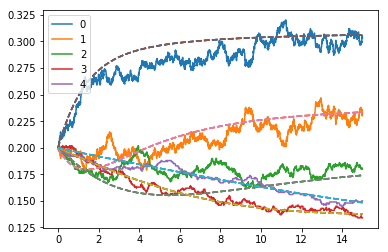

In [7]:
X=[1/K for i in range(K)]

print_simu(fct_taux,liste_transitions,X,1000,15)

In [8]:
theorique(fct_taux,liste_transitions,5,4)

[-0.038851395750410606,
 0.075038237961333909,
 0.037170741481473424,
 -0.016174636251891139]

Exemple Vélib

In [9]:
K=10
N=20
s=3
Lambda=1
Mu=0.5

y=array([sym.symbols('y_{}'.format(i)) for i in range(K)])
E=[array([1 if i==j else 0 for j in range(K)]) for i in range(K)]
liste_transition=[]
taux=[]

for i in range(K-1):
    liste_transition.append(E[i+1]-E[i])
    taux.append(Mu*y[i]*(s-sum([n*y[n] for n in range(K)])))
    
for i in range(1,K):
    liste_transition.append(E[i-1]-E[i])
    taux.append(Lambda*y[i])
    
def fct_taux(i,X):
    return(sym.lambdify(y,taux[i])(*X))

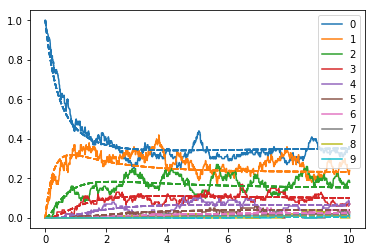

In [10]:
X=[1,0,0,0,0,0,0,0,0,0]

print_simu(fct_taux,liste_transition,X,100,10)

In [11]:
X=[1,0,0,0,0,0,0,0,0,0]
theorique(fct_taux,liste_transition,K,K-1)

[-0.10292176084411847,
 0.039044474621688807,
 0.064763975313775535,
 0.048762058614485009,
 0.023866044952782651,
 0.002612691487885844,
 -0.01170356394907981,
 -0.019540234122908881,
 -0.022526472856673283]